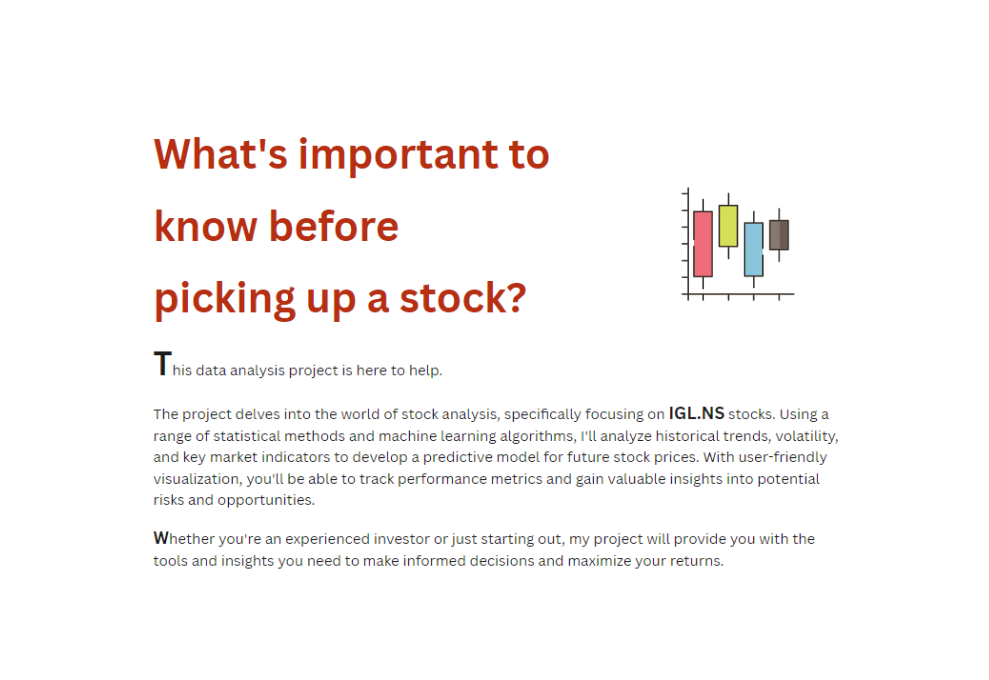

### <font color='#CA2907'>**Importing All Required Libraries**</font>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

### <font color='#CA2907'>**Using Y Finance to import Stock data**</font>

In [ ]:
import yfinance as yf

In [ ]:
ig = yf.Ticker('IGL.NS')

igl = ig.history(period="max", auto_adjust=True)

igl.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2003-12-26 00:00:00+05:30,13.207699,28.669321,13.207699,17.141296,99224725,0.0,0.0
2003-12-29 00:00:00+05:30,17.851921,20.572418,17.241783,20.529350,76012820,0.0,0.0
2003-12-30 00:00:00+05:30,20.852370,23.687719,20.852370,21.663496,101253950,0.0,0.0
2003-12-31 00:00:00+05:30,21.921904,22.869413,20.830833,21.254341,65094260,0.0,0.0
2004-01-01 00:00:00+05:30,21.821407,22.094175,21.132310,21.627598,37308910,0.0,0.0






### <font color='#CA2907'>**It is good for us that yfinance module itself used date as index to generate the dataframe**</font>

In [ ]:
igl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4790 entries, 2003-12-26 00:00:00+05:30 to 2023-05-05 00:00:00+05:30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          4790 non-null   float64
 1   High          4790 non-null   float64
 2   Low           4790 non-null   float64
 3   Close         4790 non-null   float64
 4   Volume        4790 non-null   int64  
 5   Dividends     4790 non-null   float64
 6   Stock Splits  4790 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 299.4 KB




### <font color='#CA2907'>**The Dividends and Stock Splits Columns shows 0 as prime value, checking the distinct value count**</font>

In [ ]:
igl['Dividends'].value_counts()

0.0     4768
1.0        3
0.8        2
1.1        2
1.2        2
0.6        1
0.9        1
0.5        1
0.4        1
0.3        1
0.7        1
2.0        1
2.4        1
2.8        1
3.6        1
5.5        1
3.0        1
10.0       1
Name: Dividends, dtype: int64

In [ ]:
igl['Stock Splits'].value_counts()

0.0    4789
5.0       1
Name: Stock Splits, dtype: int64

## <font color='#CA2907'> **Majority of values are zero (0), it is good enough to delete these two columns. </font>**

In [ ]:
igl.drop(['Dividends','Stock Splits'], axis= 1, inplace= True)

In [ ]:
igl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4790 entries, 2003-12-26 00:00:00+05:30 to 2023-05-05 00:00:00+05:30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4790 non-null   float64
 1   High    4790 non-null   float64
 2   Low     4790 non-null   float64
 3   Close   4790 non-null   float64
 4   Volume  4790 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 224.5 KB


In [ ]:
igl.describe()

,Open,High,Low,Close,Volume
count,4790.000000,4790.000000,4790.000000,4790.000000,4.790000e+03
mean,145.381782,147.553985,143.042496,145.139095,2.644245e+06
std,158.052253,160.200565,155.568904,157.717374,5.782734e+06
min,8.183029,8.240455,7.989222,8.096893,0.000000e+00
25%,20.736934,21.154136,20.292982,20.693667,8.716778e+05
50%,59.113422,60.436933,57.926111,59.130798,1.637080e+06
75%,268.862200,272.847864,264.276305,268.941429,2.831603e+06
max,571.154494,573.105927,557.304009,563.015564,2.358938e+08


## <font color='#CA2907'>**The data frame is now in the best shape to start the analysis, things in our favour are :**
### 1- No null values
### 2- Date - Time index
### 3- Data starting from stock launch.
### 4- Columns with their ideal datatypes.

<Axes: xlabel='Date'>

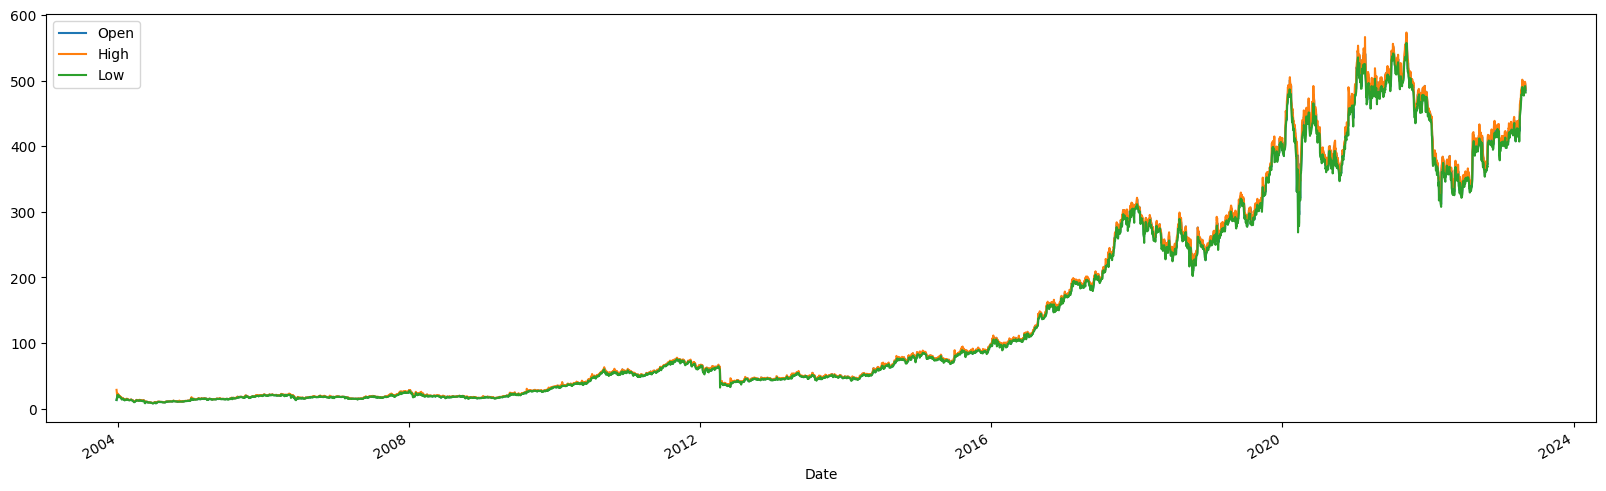

In [ ]:
# Plotting Open, High, Low toghther.
igl[['Open','High','Low']].plot(figsize =(20,6))

<Axes: xlabel='Date'>

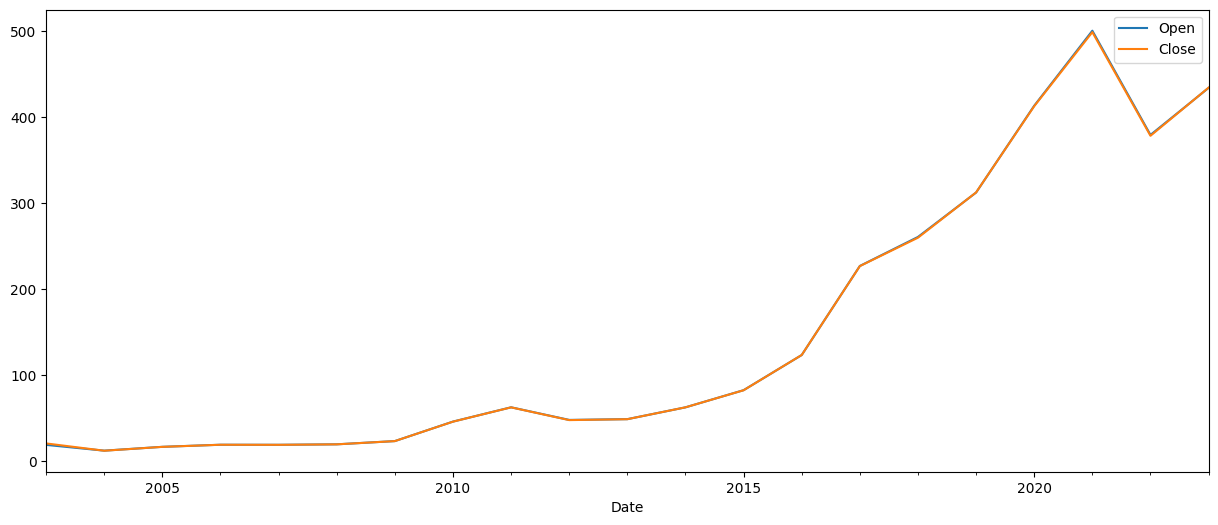

In [ ]:
# Everthing is overlapping and to dive deep, lets, resample.
igl[['Open','Close']].resample('Y').mean().plot(figsize =(15,6))

## <font color ='#CA2907'> **The Stock Price do not seem to have any major fluctuation prior 2015, however, After year 2015, stock has shown tremendous growth over years.</font>**

## --------------------------------------------------------------------------------------------------------------------------------
## **As the trend of a stock is always compared to previous day stock close value, I am going to analyse the close values of the IGL stocks first.** 
### Reason of choosing close value for analysis- 
#### In stock values the most stable value is the close value, open,high, low fluctuates with time, however close value is fixed once the market is closed, thus it is the most stable value to analyse price change over time.
#### It is the most accurate valuation of any stock until trading resumes next day.


In [ ]:
igl_close = igl['Close']
igl_close.tail()

Date
2023-04-28 00:00:00+05:30    495.299988
2023-05-02 00:00:00+05:30    493.350006
2023-05-03 00:00:00+05:30    490.700012
2023-05-04 00:00:00+05:30    484.850006
2023-05-05 00:00:00+05:30    483.149994
Name: Close, dtype: float64

<Axes: xlabel='Date'>

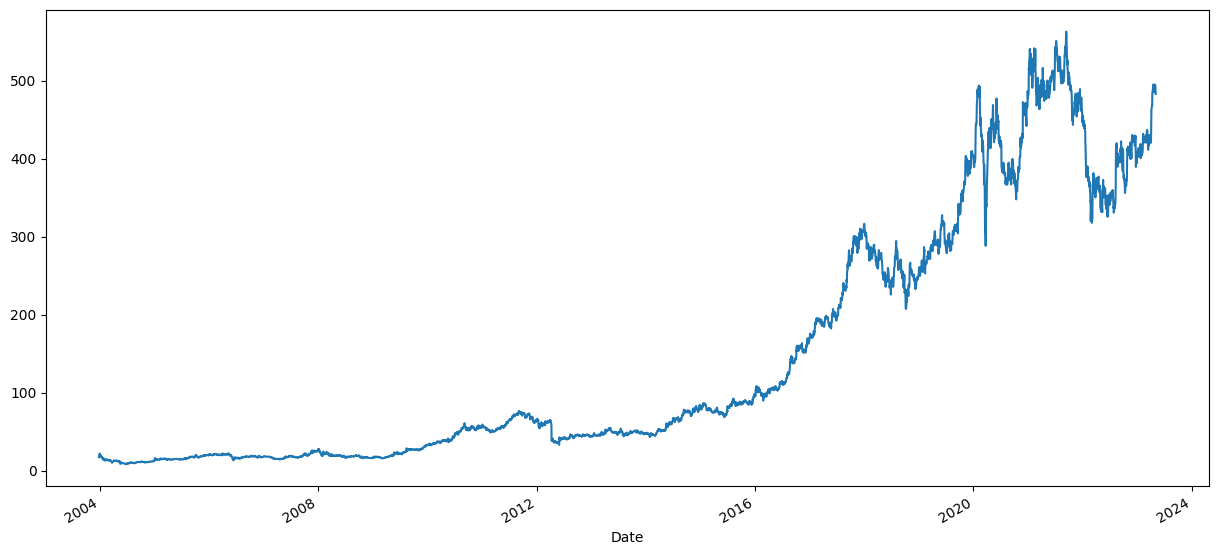

In [ ]:
igl_close.plot(figsize=(15,7))

## <font color='black'> **Analysing last 5 years of stock prices for the seasonality if any:** </font>

In [ ]:
igl_close_L5yrs= igl_close['2018-01-01':]
type(igl_close_L5yrs)

pandas.core.series.Series

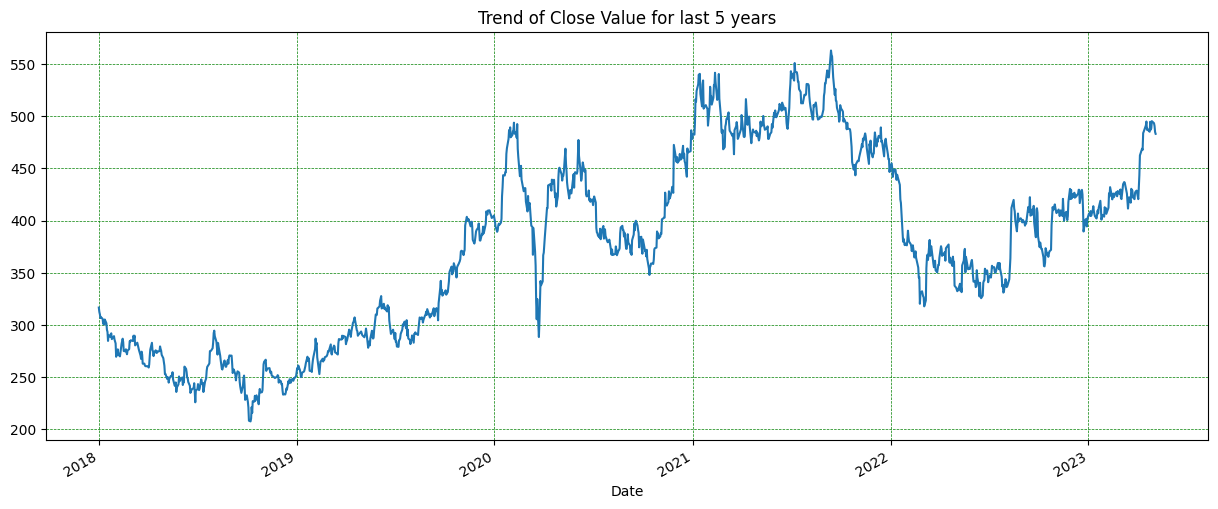

In [ ]:
plt.title('Trend of Close Value for last 5 years')
igl_close_L5yrs.plot(figsize=(15,6))
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

### **Trying to smooth the plot using Simple Moving Average for window of 30 days.**

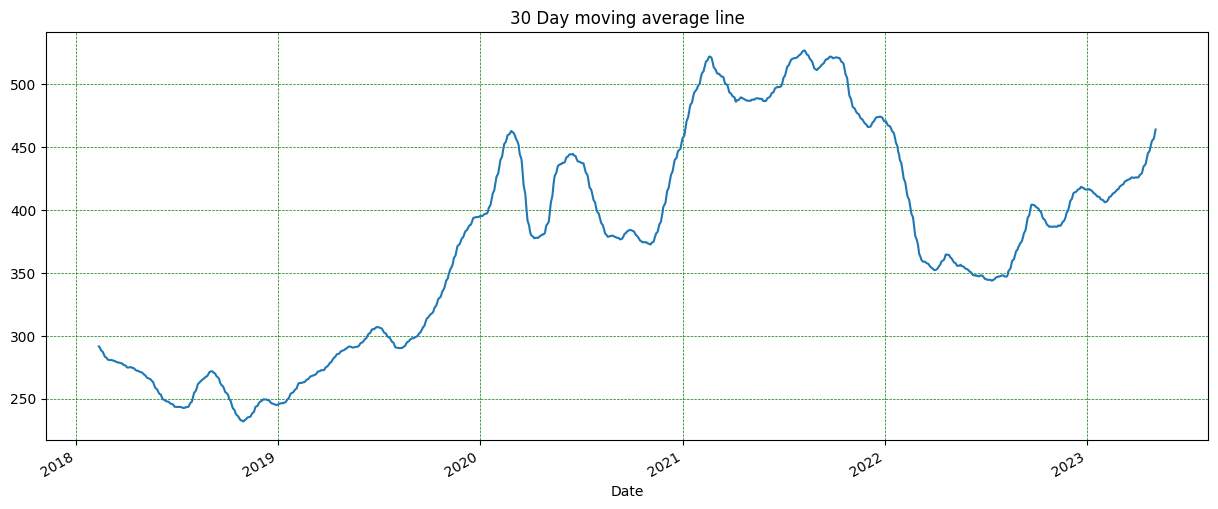

In [ ]:
igl_close_L5yrs.rolling(30).mean().plot(figsize=(15,6), grid= True)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('30 Day moving average line')
plt.show()

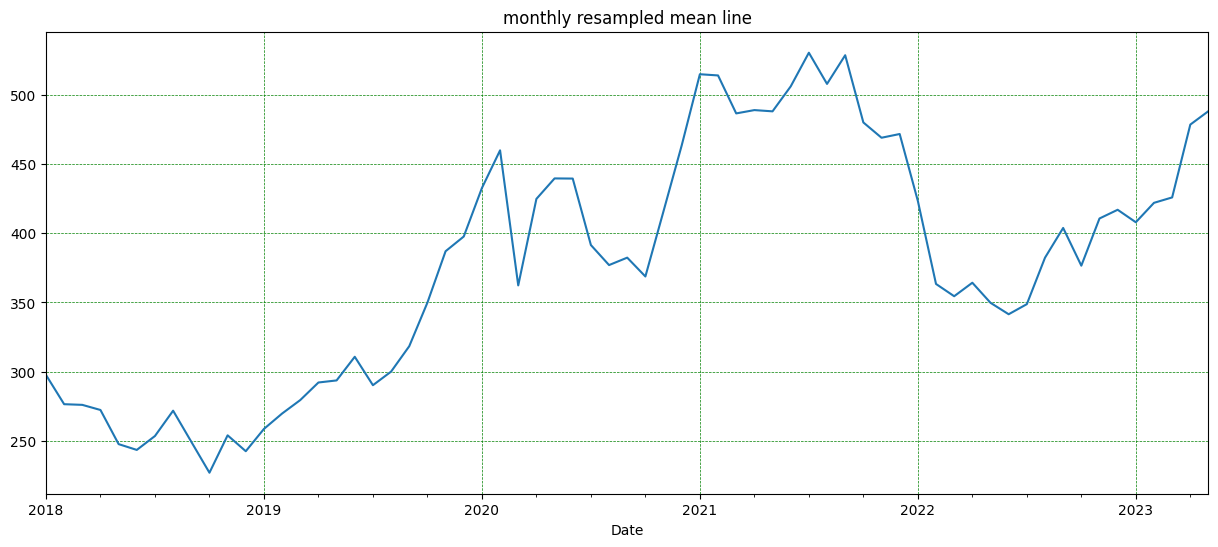

In [ ]:
igl_close_L5yrs.resample('M').mean().plot(figsize =(15,6))
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title("monthly resampled mean line")
plt.show()

### <font color='#CA2907'>**Quick Insights**</font>

**This gives us a smooth variation in stock prices over 30 days or month end,  without much noise compared to original values.**

> *  It can be seen that stocks value tends to take a dip in 3rd quarter every year.
> *  Duration between trasition from 2nd Quarter to 3rd is most favorable to get into the stock.
> *  It can be noticed that investment made in Q4 can show high return in next year Q1.


### **Trend Between Close & Open price based on moving average for a window of 30 days.**

<Axes: xlabel='Date'>

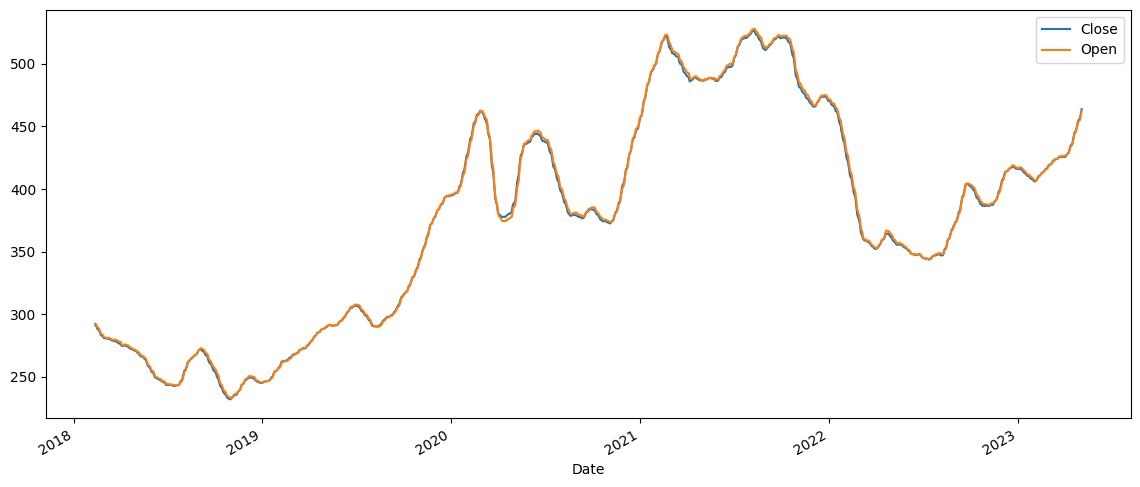

In [ ]:
igl['2018-01-01':][['Close','Open']].rolling(30).mean().plot(figsize=(14,6))

## Findings from the above graph

### 1- From 2018 to 3rd quarter of 2019 stock prices closed above open prices.
### 2- In 2021, mean of closed price was trending lower than the mean open price.
### 3- The effect of Covid-19 can be seen, the prices started falling down from the 1st quarter of 2020 and downfall happened again in 2021.
### 4- The recovery of stock started with the relaxations in Covid protocols after 3rd quarter of 2021.
### 5- Prices tumbled drastically from FI 2021-22 Q2, stocks closed less than open prices and managed to show recovery in 2022 Q1.


## ----------------------------------------------------------------------------------------------------------------------------------

# **Stock price Analysis variation between SMA and EWMA**

In [ ]:
igl_5_years = igl['2018-01-01':][['Close','Open']]

#### **igl_5_years** = portion of actual dataset that only contain records from last 5 years i.e since "2018-01-01" and have values of Close and Open stock price.

### <font color='#CA2907'>**The graph looks smoother than the plot with original values, however there is some lag in change of the trend of stock price.</font>**

## Let's visualize it for better understanding.

In [ ]:
igl_5_years['Close_rolling_50_day_SMA']= igl_5_years['Close'].rolling(50).mean()

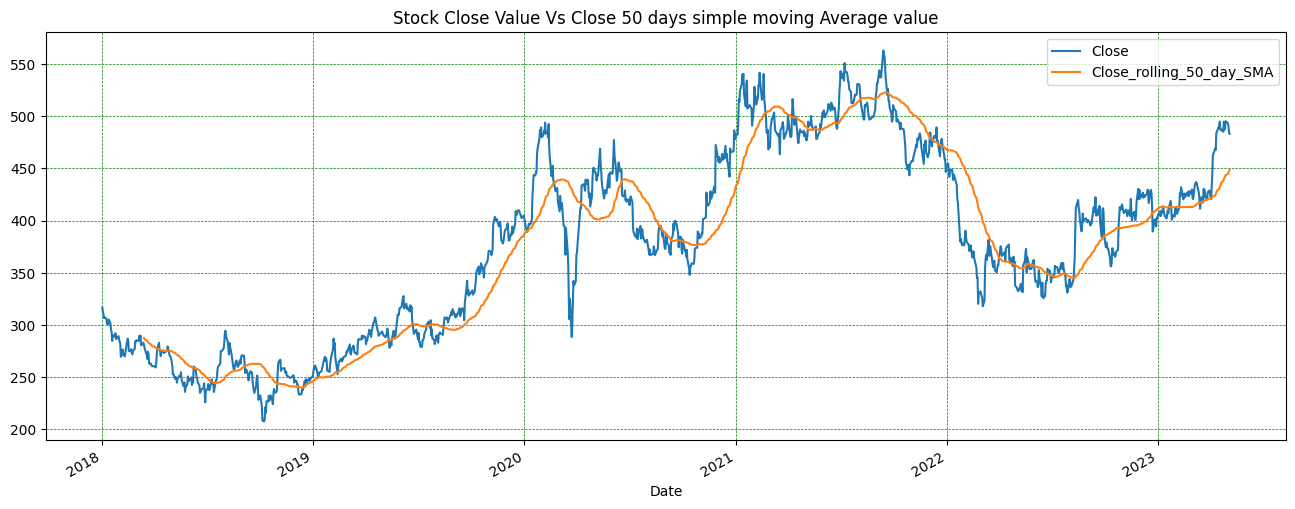

In [ ]:
igl_5_years[['Close','Close_rolling_50_day_SMA']].plot(figsize=(16,6), grid= True, legend = True)
plt.title('Stock Close Value Vs Close 50 days simple moving Average value')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

## **<font color ='#CA2907'>Adding an edited picture for better understanding what exactly lag is in this stock price SMA case.</font>**

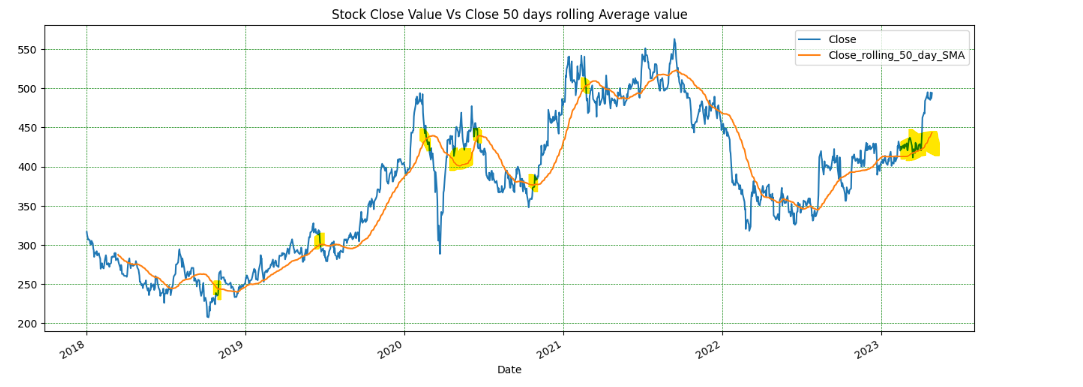

### **Focus on <font color='#F1EE0A'>Yellow</font> region, Actual value tends to rise or fall, but the Rolling average line portrays opposite trend**

In [ ]:
igl_5_years.head()

,Close,Open,Close_rolling_50_day_SMA
Date,,,
2018-01-01 00:00:00+05:30,316.568848,311.956575,NaN
2018-01-02 00:00:00+05:30,312.329315,318.944859,NaN
2018-01-03 00:00:00+05:30,310.046448,312.049747,NaN
2018-01-04 00:00:00+05:30,306.598877,311.164572,NaN
2018-01-05 00:00:00+05:30,307.344330,306.552320,NaN


## <font color ='#CA2907'>**Simple moving average contains lag, reason being that it gets trigger after the incident has happened, thus it is beter to remove any lag as much as possible from the values.</font>**

# **To do that, we will try Exponential Weighted Moving Average, it focuses on recent observation more.**

In [ ]:
igl_5_years['EMA_50_day_span']=igl_5_years['Close'].ewm(span=50, adjust=False).mean()

## **Comparing  Close, SMA and EMA values for same time span to evaluate which gives better estimate**

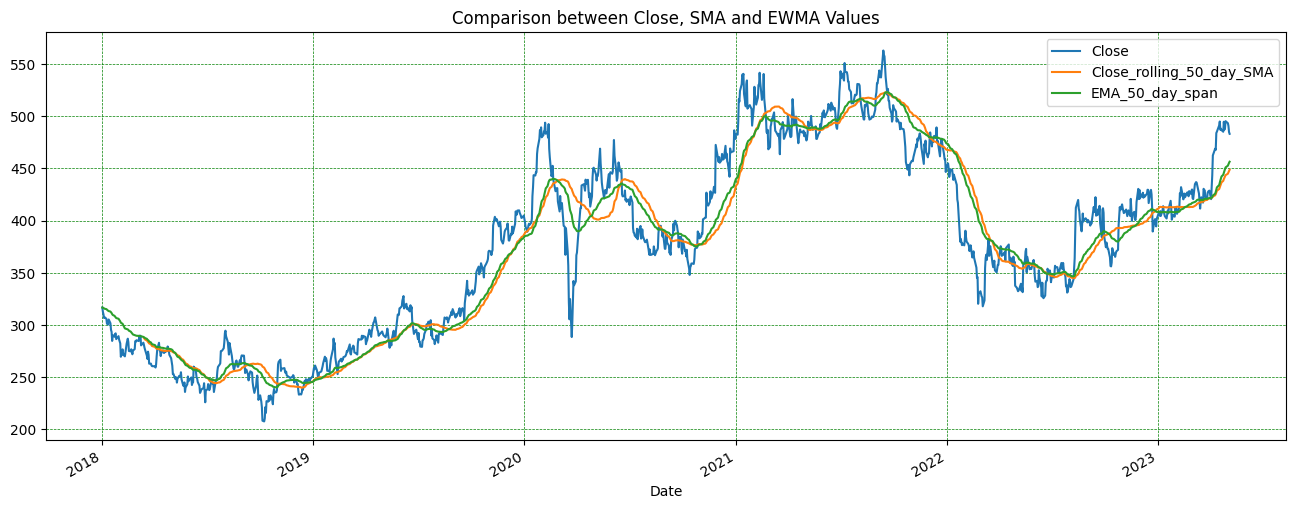

In [ ]:
igl_5_years[['Close','Close_rolling_50_day_SMA','EMA_50_day_span']].plot(figsize=(16,6))
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('Comparison between Close, SMA and EWMA Values')
plt.legend()
plt.show()

## <font color='#CA2907'> **Quick Insights** </font>
> *  EWMA is highly responsive to sudden rise and fall of the stock value pulse.
> *  EWMA line starts and ends at the same point as Original stock value.
> *  EWMA line moves much closer to original as compared to SMA line for same span.



## **Let's see difference of values between 50 days and 10 days EMA.**

In [ ]:
igl_5_years['EMA_10_day_span']=igl_5_years['Close'].ewm(span=10, adjust=False).mean()

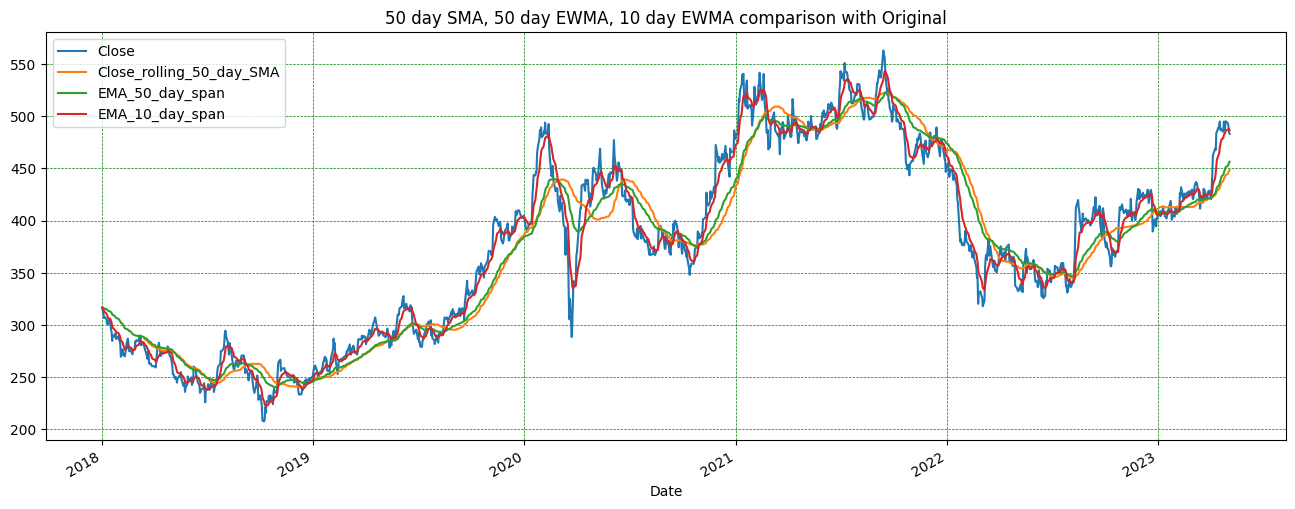

In [ ]:
igl_5_years[['Close','Close_rolling_50_day_SMA','EMA_50_day_span','EMA_10_day_span']].plot(figsize=(16,6))
plt.title('50 day SMA, 50 day EWMA, 10 day EWMA comparison with Original')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

In [ ]:
# Plotting 10 Day EMA using Plotly for interactive chart.
fig= px.line(igl_5_years, y='EMA_10_day_span', title= '10 day EWMA Analysis')
fig.update_xaxes(showgrid=True, gridcolor='LightPink')
fig.update_yaxes(showgrid=True, gridcolor='LightPink', fixedrange=True)
fig.show()

### <font color='#CA2907'>**The Plotly graph is highly interactive with zoom in feature. To use Zoom in Feature- select area on x axis by dragging the mouse**

>* **March and August are best months to invest money in the stocks**.

>* **December, May, September are the exit months**

## <font color = '#CA2907'>**Comparison of 10 Span EWMA Values  with others:**</font>
**Pros:**
>* Red line is much smoother than Original Close values
>* It resembles values much closer to Original Close values, this can be estimated by gap between Blue and Red line.
>* 10 Day EWMA gives much precise response to the changes.

**Cons:**
>* It is less stationary than SMA, which makes it difficult to create predictive ML model.


## **Volatility Check**

## <font color='#CA2907'>**Volatility means the difference between Open- Close and High-Low values of any stock.**

**Use:**
>* **This gives an idea of band-width in which the stock value fluctuates daily.**
>* **Could give an insight related to the seasonality if any within the fluctuation of stock value.**



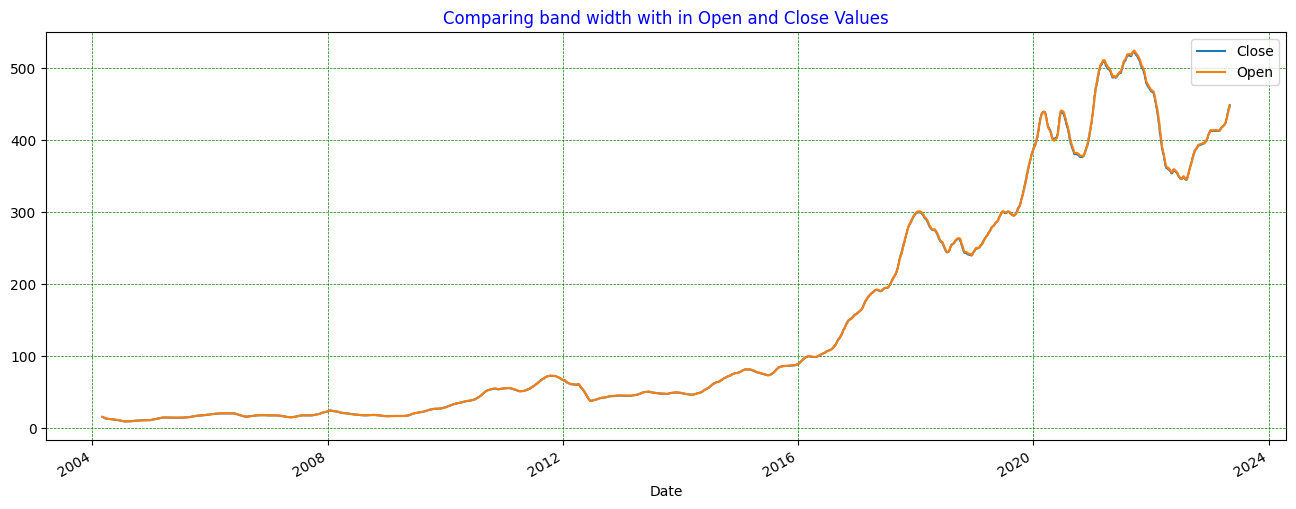

In [ ]:
igl[['Close','Open']].rolling(50).mean().plot(figsize=(16,6))
plt.title('Comparing band width with in Open and Close Values',color='blue')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

### The difference is not clearly visible with the graph as lines seems to overlap which is obvious. **I am going to create a new column having difference of Open and Close stock value**

> Noted: These values will fluctuate between Positive Axis and Negative Axis.

In [ ]:
igl['Close_Open_Difference'] = igl['Close'] - igl['Open']

Visualizing this new Column with name 'Close_Open_Difference'

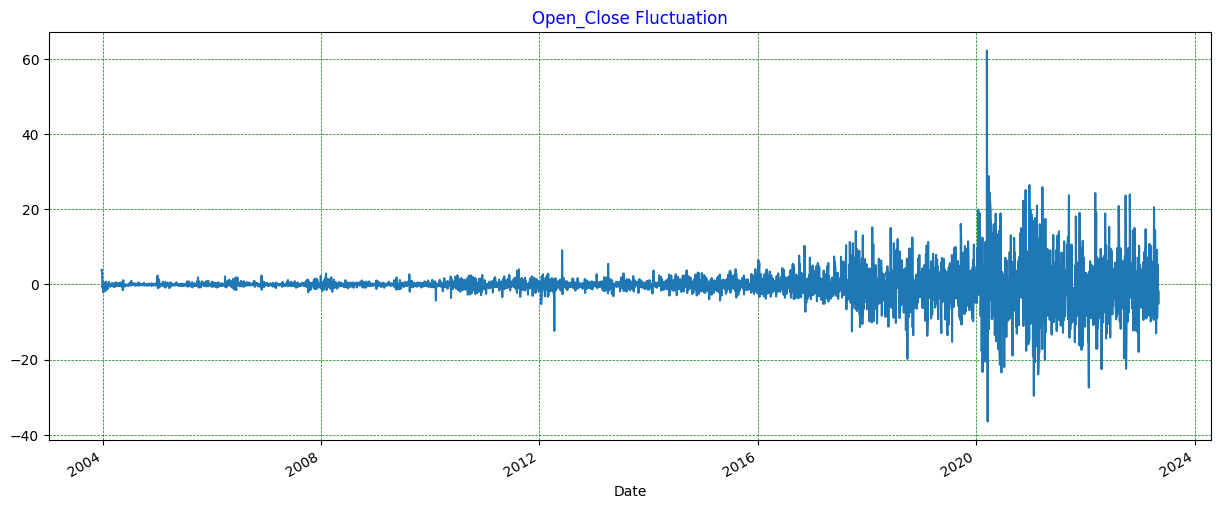

In [ ]:
igl['Close_Open_Difference'].plot(figsize=(15,6))
plt.title('Open_Close Fluctuation', color='blue')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

<font color='#CA2907'>**The fluctuation is not enough prior to 2016, however stock seems to enter into a fight zone since 2016.** 

>**Considering values from 2016 to analyse more pricisely the trends stock is reflecting now**

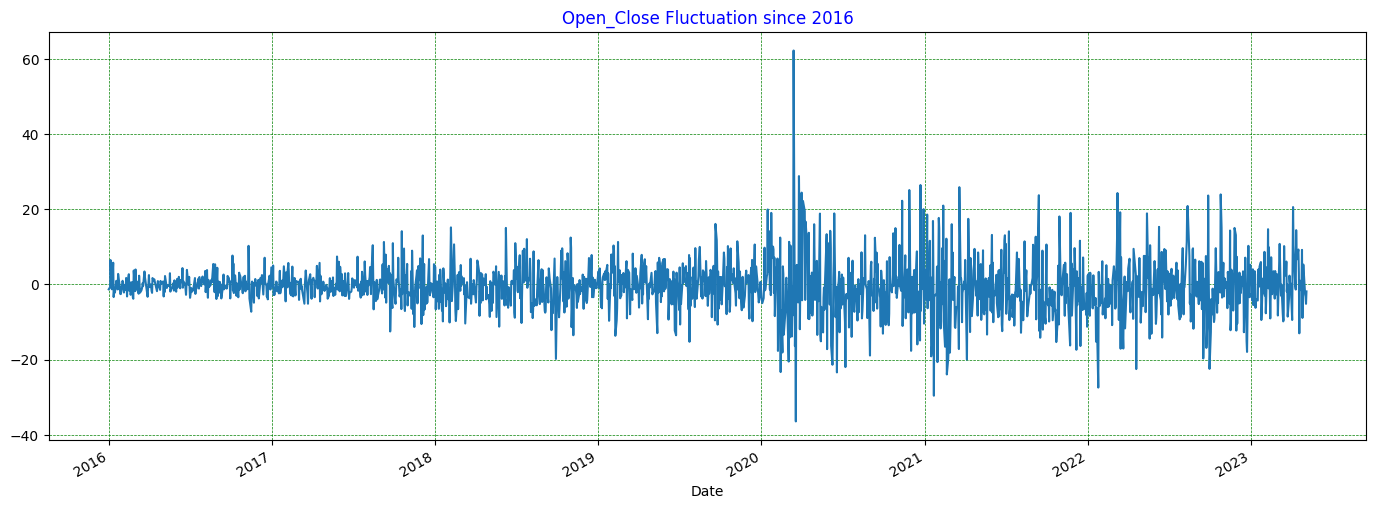

In [ ]:
igl['2016-01-01':]['Close_Open_Difference'].plot(figsize=(17,6))
plt.title('Open_Close Fluctuation since 2016', color='blue')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
data= igl['2016-01-01':]
fig = px.line(data, y="Close_Open_Difference", title='Open_Close Fluctuation since 2016')
fig.show()

**With plotly things get more clear:**

>* Highest +ve fluctuation was noticed in March 2020 where Stock closed 62 points above Open Value.
>* In the same month Stock closed 36 points below Open Value.





## <font color='#CA2907'>**✅ March 2020 seems to be a saturation point , how?** 

>* **Band-Width of fluctuation is narrower before March 2020 and broader after March 2020**

**Considering March 2020 as Time Interval when Covid hit all over the world, energy sector too got influenced with that.**

My focus will be to analyse the mean of fluctuations before and after March 2020 on both positive and negative sides.

In [ ]:
# Checking mean of positive and negative values before March 2020 from 2016.
igl_before_march2020 = igl['2016-01-01':'2020-03-01']
igl_after_march2020 = igl['2020-03-01':]

In [ ]:
igl_before_march2020['positive_close_open_diff'] = igl_before_march2020['Close_Open_Difference'].where((igl_before_march2020['Close_Open_Difference'] > 0))
igl_after_march2020['positive_close_open_diff'] = igl_after_march2020['Close_Open_Difference'].where((igl_after_march2020['Close_Open_Difference'] > 0))

<ipython-input-35-dc16f50ad6a1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-35-dc16f50ad6a1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
igl_before_march2020.head()

,Open,High,Low,Close,Volume,Close_Open_Difference,positive_close_open_diff
Date,,,,,,,
2016-01-01 00:00:00+05:30,97.972971,98.028010,96.321738,96.679504,1930200,-1.293467,NaN
2016-01-04 00:00:00+05:30,95.973140,97.138172,95.046615,95.266777,2729910,-0.706363,NaN
2016-01-05 00:00:00+05:30,95.587859,105.917221,95.431911,102.091873,13864160,6.504015,6.504015
2016-01-06 00:00:00+05:30,101.899227,104.853095,99.670066,104.155907,18552275,2.256680,2.256680
2016-01-07 00:00:00+05:30,102.192791,107.329950,101.807506,102.789070,14756335,0.596279,0.596279


In [ ]:
igl_before_march2020['negative_close_open_diff'] = igl_before_march2020['Close_Open_Difference'].where((igl_before_march2020['Close_Open_Difference'] < 0))
igl_after_march2020['negative_close_open_diff'] = igl_after_march2020['Close_Open_Difference'].where((igl_after_march2020['Close_Open_Difference'] < 0))

<ipython-input-37-386079fbdb39>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-37-386079fbdb39>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



###<font color='#CA2907'>**Focussing on Fluctuation before March 2020 First**




In [ ]:
igl_before_march2020['positive_close_open_diff'].mean()

3.2163278252298966

In [ ]:
igl_before_march2020['positive_close_open_diff'].max()

19.949497812355332

In [ ]:
igl_before_march2020['negative_close_open_diff'].min()

-23.30591643035922

In [ ]:
igl_before_march2020['negative_close_open_diff'].mean()

-3.3123135556336236

In [ ]:
igl_before_march2020['EMA_7_day_span_close_Open_diff']=igl_before_march2020['Close_Open_Difference'].ewm(span=7, adjust=False).mean()

<ipython-input-42-58cdda86aee3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



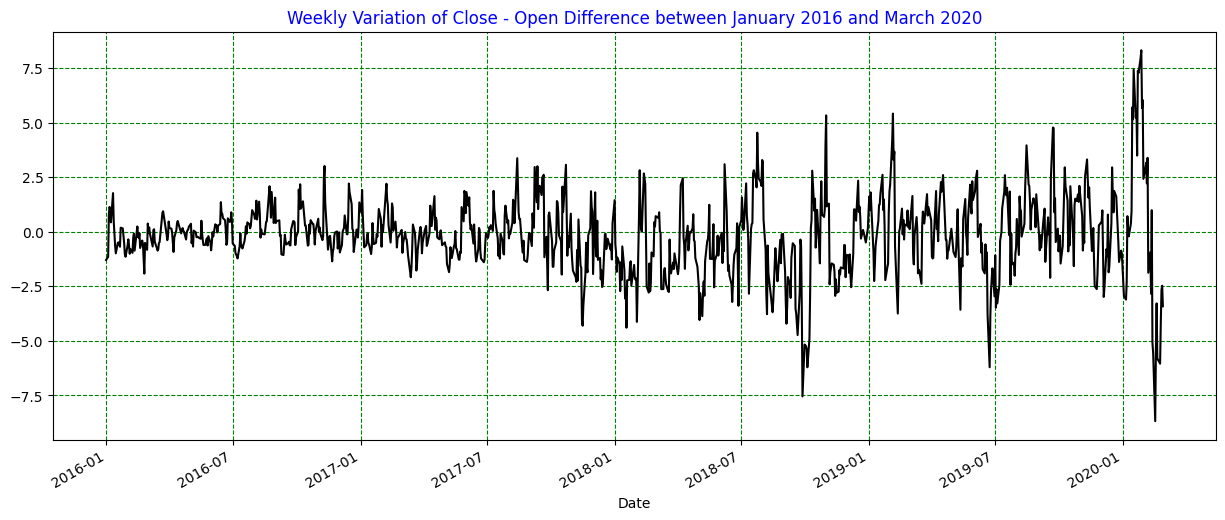

In [ ]:
igl_before_march2020['EMA_7_day_span_close_Open_diff'].plot(figsize=(15,6), color='black')
plt.title('Weekly Variation of Close - Open Difference between January 2016 and March 2020', color = 'blue')
plt.grid(color='green', ls='--')

In [ ]:
igl_before_march2020.reset_index(inplace=True)
igl_before_march2020['month'] = igl_before_march2020['Date'].dt.strftime('%m')
fig= px.bar(igl_before_march2020, x= 'month', y= 'EMA_7_day_span_close_Open_diff',template = 'plotly_dark', title='Close-Open gap trend Vs Months From 2016 to March 2020')
fig.show()
#igl_before_march2020.plot.bar(x='month',y='EMA_7_day_span_close_Open_diff', figsize=(18,6))
igl_before_march2020.set_index('Date', inplace=True)

<ipython-input-44-9cdbbdc1b102>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**January, July, August seems to be month when Close-Open Difference tends towards Positive side more than the negative side before March 2020.**


## <font color='#CA2907'>** Quick Insights**

>* **Average Fluctuation from 2016 to March 2020 range between -5 to +5 points difference.**

>* **Stock Closed max by 19 points above Open value and closed maximum of 23 points below Open value.**

>* **Mean Close_Open Difference remained at 3 points.**


_**Negative Sign means stock closed below Open Value**_



###<font color='#CA2907'>**Focussing on Fluctuation after March 2020 First**


In [ ]:
igl_after_march2020['negative_close_open_diff'].mean()

-6.354307642860558

In [ ]:
igl_after_march2020['positive_close_open_diff'].mean()

6.722638943752348

In [ ]:
igl_after_march2020['positive_close_open_diff'].max()

62.25944679945985

In [ ]:
igl_after_march2020['negative_close_open_diff'].min()

-36.4479930151017

<ipython-input-49-217e41b57baa>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



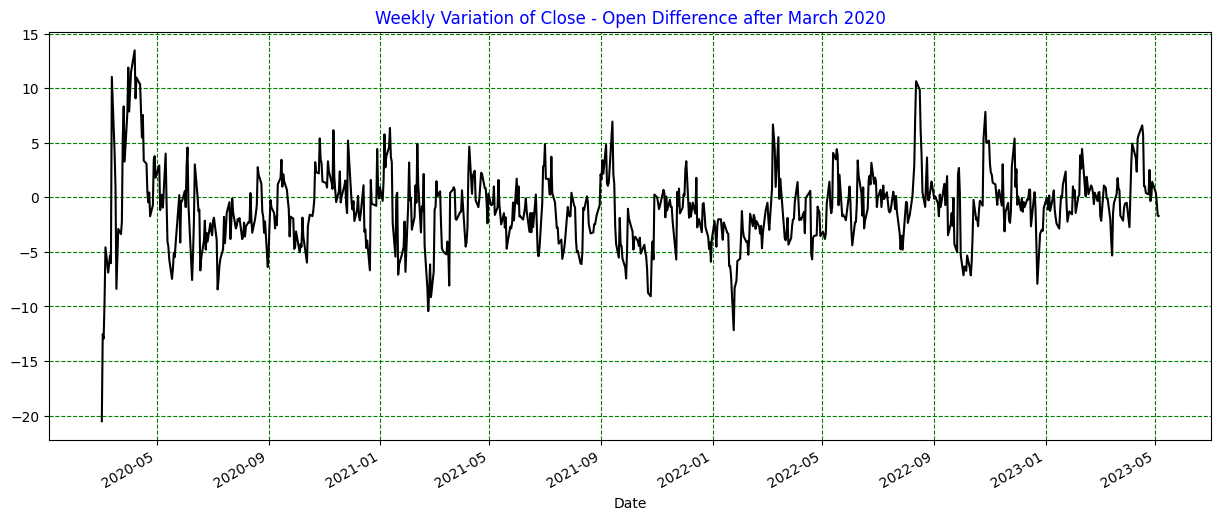

In [ ]:
igl_after_march2020['EMA_10_day_span_close_Open_diff']=igl_after_march2020['Close_Open_Difference'].ewm(span=7, adjust=False).mean()
igl_after_march2020['EMA_10_day_span_close_Open_diff'].plot(figsize=(15,6),color= "black")
plt.title('Weekly Variation of Close - Open Difference after March 2020', color = 'blue')
plt.grid(color='green', ls='--')

In [ ]:
igl_after_march2020.reset_index(inplace=True)
igl_after_march2020['month'] = igl_after_march2020['Date'].dt.strftime('%m')
fig= px.bar(igl_after_march2020, x= 'month', y= 'EMA_10_day_span_close_Open_diff', template= 'plotly_dark',title='Close-Open gap trend Vs Months From March 2020 to Present')
fig.show()
#igl_before_march2020.plot.bar(x='month',y='EMA_7_day_span_close_Open_diff', figsize=(18,6))
igl_after_march2020.set_index('Date', inplace=True)

<ipython-input-50-0c16321b065c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## <font color='#CA2907'> **Quick insights**</font>

> *  **While uptrend, difference between high and low is relatively high, which makes this stock attractive for trading.**

> * **This also denotes the volatility of the stock, focus on area between 2020 and 2021, the gap between low and high is super high which persisted for  5 months.**

> *  **This high gap leaned towards starting of year every year and diminishes after mid year.**

>* **After March 2020,   "April" is the only month where majority of times, stock closed above Open value.**

>* **Stock Closed max by 62 points above Open value and closed maximum of 36 points below Open value.**

>* **Mean Close_Open Difference remained at 6 points.**



<font color='#CA2907'>**After March 2020, Only April is the month where positive difference between close and open prices is highest. All other months show negative trend which means on most of the instance, Stock closed lower than the open price.**</font>


_**Negative Sign means stock closed below Open Value**_



# <font color='#CA2907'>**High Low Volatility**


In [ ]:
igl['High_low_diff'] = igl['High'] - igl['Low']
igl.head()

,Open,High,Low,Close,Volume,Close_Open_Difference,High_low_diff
Date,,,,,,,
2003-12-26 00:00:00+05:30,13.207699,28.669321,13.207699,17.141296,99224725,3.933597,15.461621
2003-12-29 00:00:00+05:30,17.851921,20.572418,17.241783,20.529350,76012820,2.677429,3.330635
2003-12-30 00:00:00+05:30,20.852370,23.687719,20.852370,21.663496,101253950,0.811126,2.835349
2003-12-31 00:00:00+05:30,21.921904,22.869413,20.830833,21.254341,65094260,-0.667563,2.038579
2004-01-01 00:00:00+05:30,21.821407,22.094175,21.132310,21.627598,37308910,-0.193809,0.961865


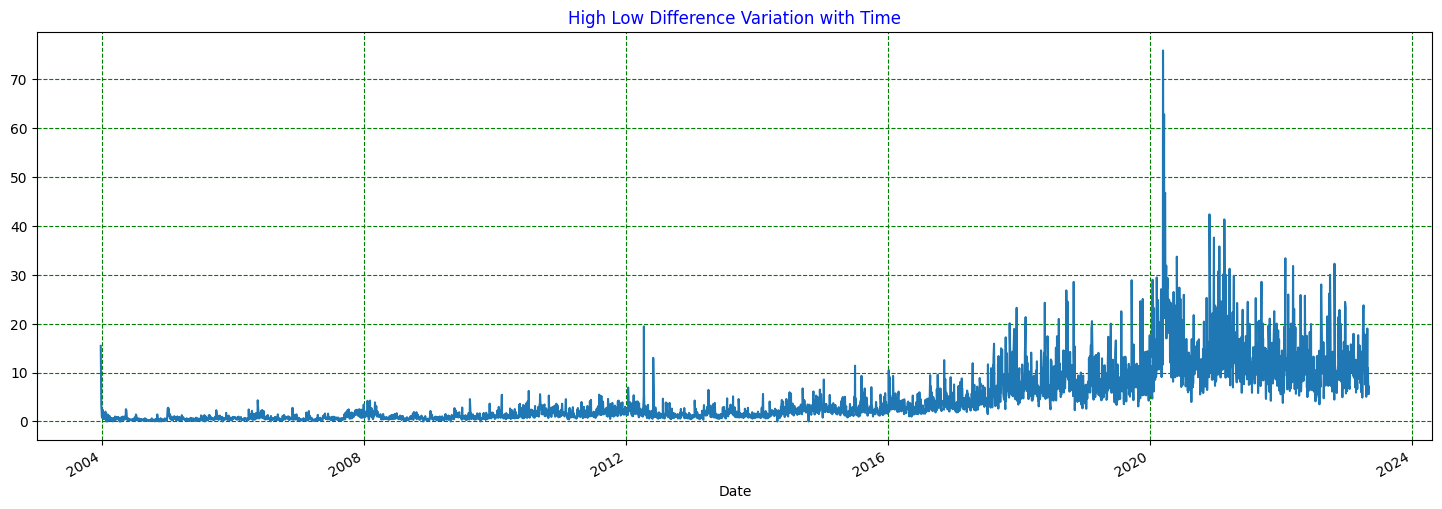

In [ ]:
#Plotting igl high low diff
igl['High_low_diff'].plot(figsize=(18,6))
plt.title('High Low Difference Variation with Time', color='blue')
plt.grid(color='green',ls='--')
plt.show()

## <font color='#CA2907'>**Points to notice:**

>* **The variation is almost similar and seems constant befoe 2016 with not much difference, however after 2016 there is a tremendous change**


>* **Again in March 2020 there is sharp upturn and trend of the series changed.**


**I will divide my analysis into two parts:-**

>* First: 2016 to March 2020

>* March 2020 to present.

## <font color='#CA2907'>**High-Low Analysis from 2016 to March 2020**






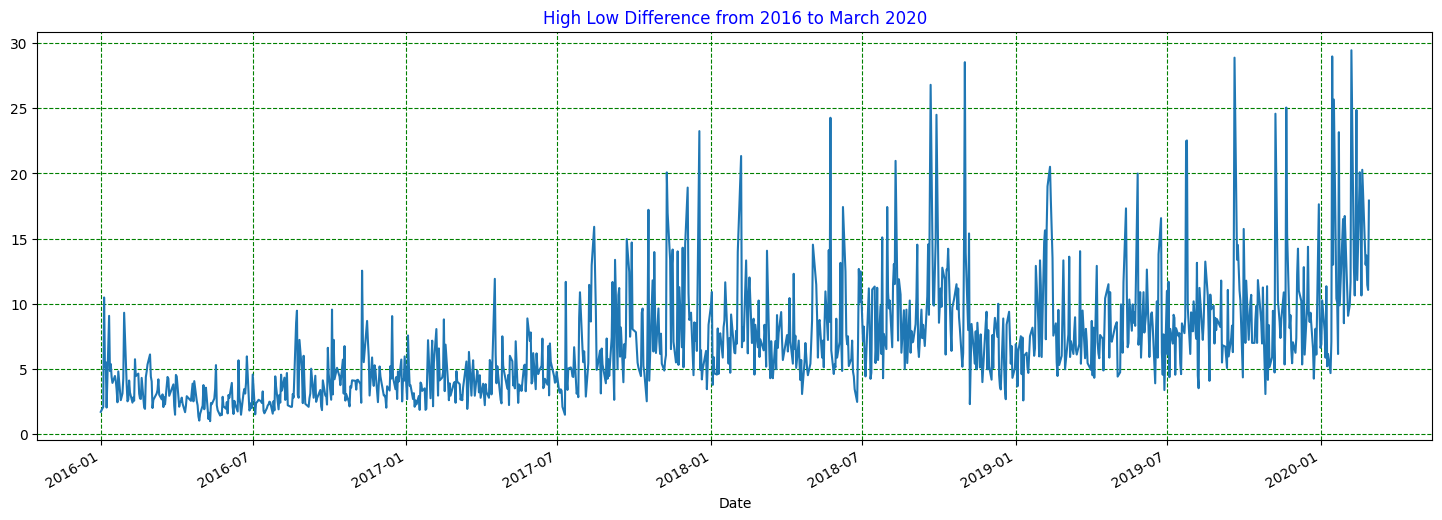

In [ ]:
igl['2016-01-01':'2020-03-01']['High_low_diff'].plot(figsize=(18,6))
plt.title('High Low Difference from 2016 to March 2020', color= 'blue')
plt.grid(color='green',ls='--')
plt.show()

**EMA could help smooth the graph and point out upper and lower limit of the band more clearly.**

In [ ]:
igl['High_Low_7_day_EMA'] = igl['2016-01-01':'2020-03-01']['High_low_diff'].ewm(span=7, adjust=False).mean()

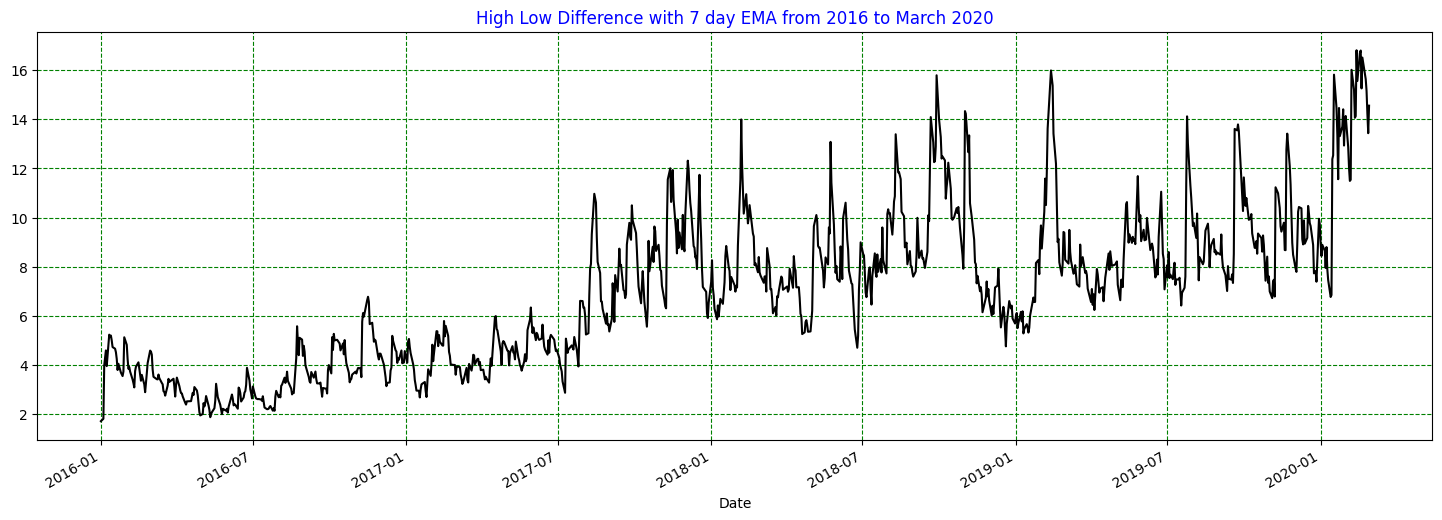

In [ ]:
igl['High_Low_7_day_EMA'].plot(figsize=(18,6), color= 'black')
plt.title('High Low Difference with 7 day EMA from 2016 to March 2020', color= 'blue')
plt.grid(color='green',ls='--')
plt.show()

In [ ]:
igl.reset_index(inplace=True)
igl['month'] = igl['Date'].dt.strftime('%m')
fig= px.bar(igl, x= 'month', y= 'High_Low_7_day_EMA', template= 'plotly_dark',title='High-Low Gap Trend Vs Months before MArch 2020')
fig.show()
#igl_before_march2020.plot.bar(x='month',y='EMA_7_day_span_close_Open_diff', figsize=(18,6))
igl.set_index('Date', inplace=True)

## <font color='#CA2907'>**Quick insights**

### <font color='blue'> **The Y-Axis shows cummulative records grouped by Month for High Low Gap**</font>

>* **This can be concluded that February is the Month were most of the time High-Low gaps are maximum in number.**

>* **The range of gap is between 5 to 14 on an average, Which moved up from 3 to 6 in 2017**

## <font color='#CA2907'>**High-Low Analysis from March 2020**

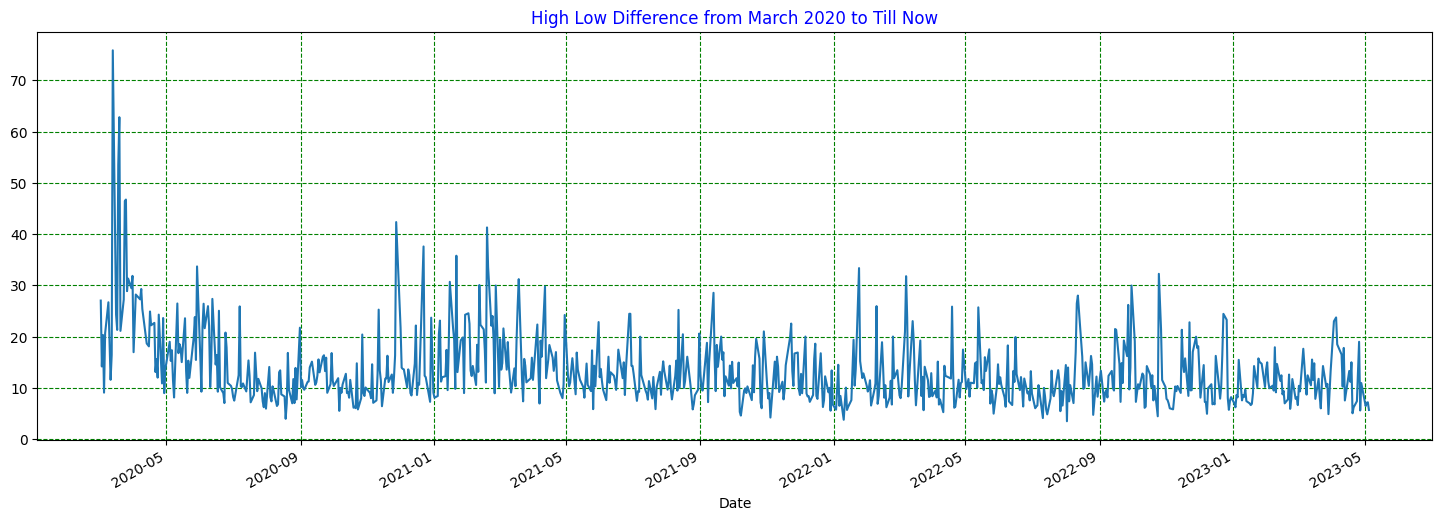

In [ ]:
igl['2020-03-01':]['High_low_diff'].plot(figsize=(18,6))
plt.title('High Low Difference from March 2020 to Till Now', color= 'blue')
plt.grid(color='green',ls='--')
plt.show()

**Using EMA to smooth the series**

In [ ]:
igl['High_Low_7_day_EMA_after_2020'] = igl['2020-03-01':]['High_low_diff'].ewm(span=7, adjust=False).mean()

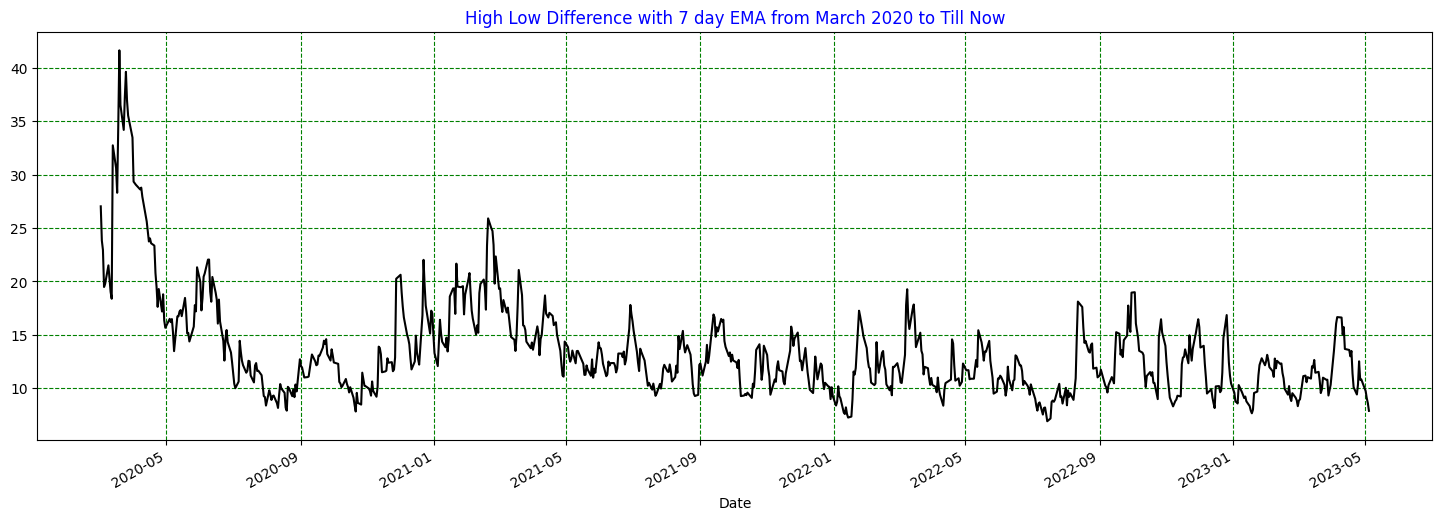

In [ ]:
igl['High_Low_7_day_EMA_after_2020'].plot(figsize=(18,6), color= 'black')
plt.title('High Low Difference with 7 day EMA from March 2020 to Till Now', color= 'blue')
plt.grid(color='green',ls='--')
plt.show()

In [ ]:
igl.reset_index(inplace=True)
igl['month'] = igl['Date'].dt.strftime('%m')
fig= px.bar(igl, x= 'month', y= 'High_Low_7_day_EMA_after_2020', template= 'plotly_dark',title='High-Low Gap Trend Vs Months from March 2020 to Till Now')
fig.show()
#igl_before_march2020.plot.bar(x='month',y='EMA_7_day_span_close_Open_diff', figsize=(18,6))
igl.set_index('Date', inplace=True)

# <font color='#CA2907'>**Quick Insights**

### <font color='blue'> **The Y-Axis shows cummulative records grouped by Month for High Low Gap**</font>

>* **This can be concluded that after March 2020 March became the Month were most of the time High-Low gaps are maximum in number.**

>* **The range of gap is between 10 to 16 on an average, Which moved up from 5 to 14 before March 2020**

# **Volume Analysis**





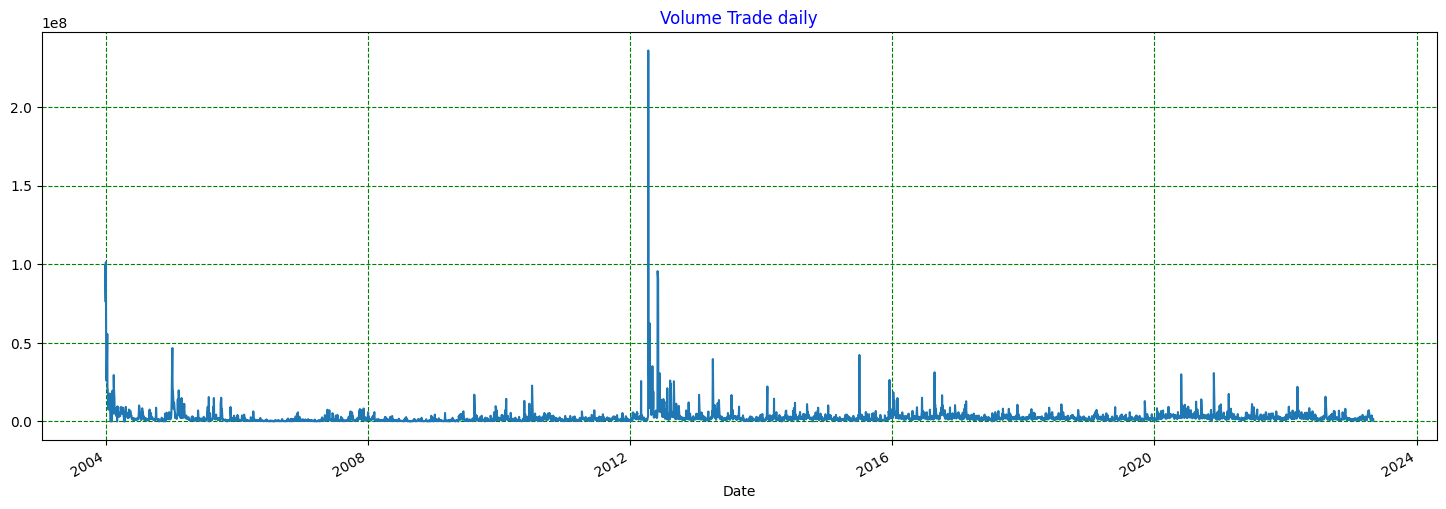

In [ ]:
igl['Volume'].plot(figsize=(18,6))
plt.title('Volume Trade daily', color= 'blue')
plt.grid(color='green',ls='--')
plt.show()

# Plotting the same plot using plotly


In [ ]:
data1 = igl
fig1 = px.line(data1, y="Volume", title='Volume Trend Over Time')
fig1.show()

## **Checking monthly mean of volume traded to highlight any seasonality**


In [ ]:
igl['Volume_30_day_SMA']= igl['Volume'].rolling(30).mean()
fig2 =px.line(igl, y='Volume_30_day_SMA', title='Volume_trend_with_30_day_SMA', )
fig2.show()

>* **Trend seems to be slow in January every Year and rises in February.**


In [ ]:
igl['volume 30 day ema']= igl['Volume'].ewm(span= 30, adjust=False).mean()
fig2 = px.line(igl['2016-01-01':], y= 'volume 30 day ema', title='Volume 30 Day Ema plot')
fig2.update_yaxes(showgrid=True, gridcolor='green', fixedrange=True)
fig2.update_xaxes(showgrid=True, gridcolor='green')
fig2.show()

**Quick Insights**

 Min - May-July-Dec	

Falls in	- Feb	

Start rising in- May-July	


Max- mar

In [ ]:
igl['Close 30 day ema']= igl['Close'].ewm(span= 30, adjust=False).mean()
fig3 = px.line(igl['2016-01-01':], y= 'Close 30 day ema', title='Close 30 Day Ema plot')
fig3.update_yaxes(showgrid=True, gridcolor='green', fixedrange=True)
fig3.update_xaxes(showgrid=True, gridcolor='green')
fig3.show()

The Close Value falls in February which was higher in January. 

Thus the monthly average of volume traded was because of selling in the stocks.


# **Checking Highly traded Month**

In [ ]:
igllaterMarch2020 = igl['2020-03-01':]
igllaterMarch2020.reset_index(inplace=True)
igllaterMarch2020['month'] = igllaterMarch2020['Date'].dt.strftime('%m')
fig= px.bar(igllaterMarch2020, x= 'month', y= 'Volume', template= 'plotly_dark',title='Volume Traded Vs Month')
fig.show()
#igl_before_march2020.plot.bar(x='month',y='EMA_7_day_span_close_Open_diff', figsize=(18,6))
igllaterMarch2020.set_index('Date', inplace=True)

<ipython-input-66-222d67fb467c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##<font color='blue'>**Y scale measure sum of total volume traded in specific month from MArch 2020 to till now, Band gap shows number of stocks traded in that specific month in 1 year**

>* **March Being the month when highest number of stocks were traded for IGL till now.**

>* **May, August,December shows high width gaps**

# <font color='red'> ------------------------------------------------------------------------------------------------------- </font>

#  <font color='#CA2907'> **Golden Cross and Death Cross**

## **In stock market two terms are widely known for their importance 1> Golden Cross and  2> Death Cross.**

## We will now try to see if IGL stock came across any such incident or not.

In [ ]:
igl_5_years['Close_SMA_200_days_span']= igl_5_years['Close'].rolling(200).mean()

<Axes: xlabel='Date'>

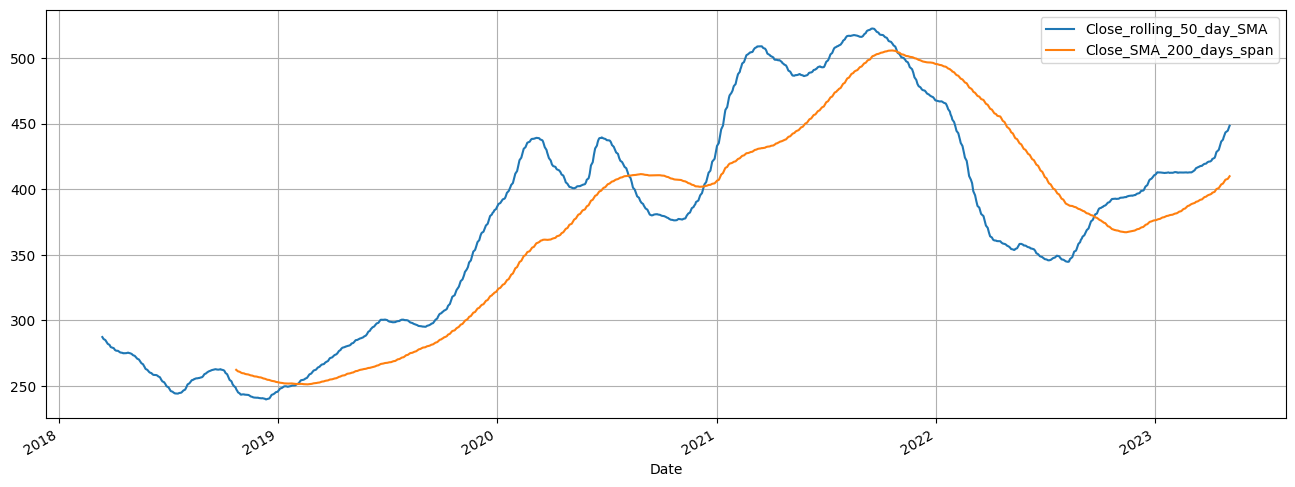

In [ ]:
igl_5_years[['Close_rolling_50_day_SMA','Close_SMA_200_days_span']].plot(figsize=(16,6), grid=True, legend=True)

## **It can be seen in the graph that in 5 year term, stock has shown around 3 Golden cross and 2 Death cross. The stock is highly volatile and can create good returns if invested with proper research.**

##<font color='#CA2907'>**Using EMA to highlight Golden Cross and Death Cross with higher responsiveness**</font>

In [ ]:
igl_5_years['EMA_200_day_span']=igl_5_years['Close'].ewm(span=200, adjust=False).mean()

<Axes: xlabel='Date'>

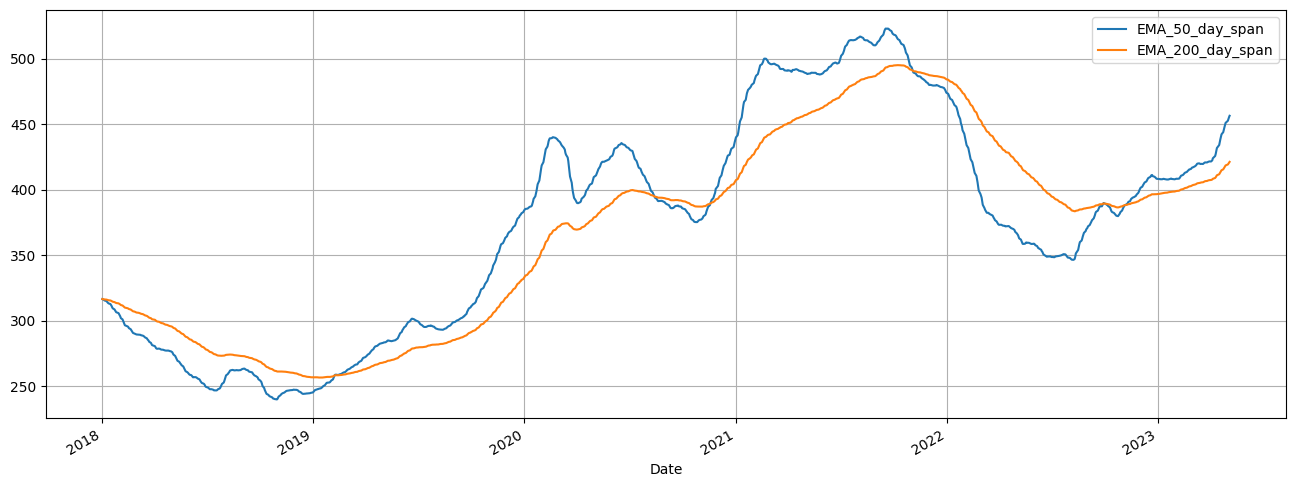

In [ ]:
igl_5_years[['EMA_50_day_span','EMA_200_day_span']].plot(figsize=(16,6), grid=True, legend=True)

## It can also be seen in the graph plotted with exponential moving average values, Golden cross and death cross have less lag.

# <font color='blue'>**Conclusion**</font>

### <font color='Blue'>**This Conclusion involves :**

>* **Close Price Analysis**

>* **Comparison : Simple Moving Average Vs Exponential Moving Average**

>* **Close-Open Volatility Analysis**

>* **High-Low Volatility Analysis**

>* **Volume Traded Analysis**

>* **Golden Cross And Death Cross Analysis**



## <font color='#CA2907'>**Close Price Analysis**</font>

>* **Close Price dips in 3rd Quarter**

>* **Time - Period transition from 3rd Quarter to 1st Quarter next month is most favorable to enter into buying trade.**

>* **Best mnoths to buy - MARCH, AUGUST**

>* **Best months to sell - DECEMBER, MAY, SEPTEMBER.**


### <font color='#CA2907'>**Close Price Coparison between SMA & EMA**</font>

**Pros:**
>* EMA line is much smoother than Original Close values
>* It resembles values much closer to Original Close values, this can be estimated by gap between EMA and Close Price line.
>* EMA is higly responsive to sudden changes.

**Cons:**
>* It is less stationary than SMA, which makes it difficult to create predictive ML model.

## <font color='#CA2907'>**Close-Open Volatility Analysis**</font>

>* **Stock seems to have stable fluctuations in Close-Open price difference prior to 2016**

>* **Since 2016 stock gained momemtum and Close-Open difference gap increased.**

**Two sudden changes found in analysis, This analysis focus on volatility in two parts on the basis of time period**

### **1- Time period from 2016 to March 2020**

>* **January, July, August shows high positive difference between Close-Open prices**

>* **Max Range : -19 to +23**

>* **Mean : 3**

>* **Average Fluctuation : -5 to +5**


### **2- Time period from March 2020 to Current date**

>* **April shows high positive difference between Close-Open prices**

>* **Max Range : -36 to +62**

>* **Mean : 6**

>* **Average Fluctuation : -6 to +7**


### <font color='#CA2907'> **March 2020 shows tremendous change which is highly influenced by Covid-19 sentiments**</font>

###<font color='#CA2907'> **Another change noticed in 2022 which was highly influenced by Russia-Ukrain war**



## <font color='#CA2907'>**High-Low Volatility Analysis**</font>

### **Time period from 2016 to March 2020**

>* **February has the maximum number high (High-Low) gaps.**
>* **The range of gap is between 5 to 14 on an average, Which moved up from 3 to 6 in 2017**


### **Time period from March 2020 to Current Date**

>* **After March 2020, March has the maximum number high (High-Low) gaps.**
>* **The range of gap is between 10 to 16 on an average.**

## <font color='#CA2907'>**Volume Traded Analysis**</font> 

>* **January holds less Volume traded.**

>* **February has the highest volume traded, Something to notice, "In February", stock price dips thus this increase in volume traded comes into action first with selling**


### **Trend of Stock Volume**

**Min** :- May, July, December

**Falls In** :- Feb

**Start Rising In** :- May, July

**Max** :- March





## <font color='#CA2907'>**Golden Cross & Death Cross**</font> 

**During my analysis I majorly focussed on last 5 year time period, There are two reason :**

>* **A tremendous change was observed in the behaviour of stock nearly 5 years ago.**

>* **Stocks being highly volatile in nature and changing there state every second, it is good to observe new trends currently reflecting from stocks.**


### <font color='#CA2907'>**Within last 5 Year period, I observed 3 Golden Cross and 2 Death cross and every one made high diffrence in the stock value followed later**</font> 


**I conclude that IGL being under the umbrella of energy stock is highly unpredictable but can offer high returns if carefully managed**

#### <font color='#CA2907'>**March-August**</font> **are my favriote months to call buy action on "IGL.NS"**
